In [7]:
import os
import pandas as pd
import openpyxl
import numpy as np
from glob import glob
from tqdm import tqdm

In [8]:
DATASET_PATH = "dataset" 
TRAIN_DATA_PATH = os.path.join(DATASET_PATH, "train/data")
LABELS_PATH = os.path.join(DATASET_PATH, "train/labels.xlsx")

In [18]:
labels_df = pd.read_excel(LABELS_PATH, header=1)
labels_df.columns = ["Case#", "Spacecraft#", "Condition", 
                     "Opening_Ratio_SV1", "Opening_Ratio_SV2", "Opening_Ratio_SV3", "Opening_Ratio_SV4", 
                     "Bubble_BP1", "Bubble_BP2", "Bubble_BP3", "Bubble_BP4", "Bubble_BP5", "Bubble_BP6", "Bubble_BP7", "Bubble_BV1"]
labels_df

,Case#,Spacecraft#,Condition,Opening_Ratio_SV1,Opening_Ratio_SV2,Opening_Ratio_SV3,Opening_Ratio_SV4,Bubble_BP1,Bubble_BP2,Bubble_BP3,Bubble_BP4,Bubble_BP5,Bubble_BP6,Bubble_BP7,Bubble_BV1
0,1,1,Normal,100,100,100,100,No,No,No,No,No,No,No,No
1,2,1,Normal,100,100,100,100,No,No,No,No,No,No,No,No
2,3,1,Normal,100,100,100,100,No,No,No,No,No,No,No,No
3,4,1,Normal,100,100,100,100,No,No,No,No,No,No,No,No
4,5,1,Normal,100,100,100,100,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,173,3,Anomaly,100,100,100,100,No,No,No,Yes,No,No,No,No
173,174,3,Anomaly,100,100,100,100,No,No,No,No,Yes,No,No,No
174,175,3,Anomaly,100,100,100,100,No,No,No,No,No,Yes,No,No
175,176,3,Anomaly,100,100,100,100,No,No,No,No,No,No,Yes,No


In [19]:
def load_case_data(case_id):
    case_file = os.path.join(TRAIN_DATA_PATH, f"Case{case_id:03d}.csv")
    if not os.path.exists(case_file):
        return None
    
    df = pd.read_csv(case_file)

    df["Case#"] = case_id

    return df

In [20]:
all_data = []
for case_id in tqdm(range(1, 178)):  # Case1 ~ Case177
    case_df = load_case_data(case_id)
    if case_df is not None:
        all_data.append(case_df)

100%|████████████████████████████████████████| 177/177 [00:00<00:00, 706.10it/s]


In [21]:
full_df = pd.concat(all_data, ignore_index=True)
labels_df["Case#"] = labels_df["Case#"].astype(int)
full_df["Case#"] = full_df["Case#"].astype(int)

In [22]:
full_df

,TIME,P1,P2,P3,P4,P5,P6,P7,Case#
0,0.000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1
1,0.001,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1
2,0.002,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1
3,0.003,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1
4,0.004,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1
...,...,...,...,...,...,...,...,...,...
212572,1.196,1.948734,1.912482,1.904362,1.835654,1.924899,1.857220,1.920020,177
212573,1.197,1.948823,1.899824,1.884360,1.825497,1.927513,1.846068,1.919081,177
212574,1.198,1.957784,1.911383,1.893740,1.859805,1.940953,1.861668,1.950562,177
212575,1.199,1.970451,1.950009,1.945417,1.913911,1.953648,1.835381,1.983321,177


In [23]:
merged_df = full_df.merge(labels_df, on="Case#", how="left")
merged_df

,TIME,P1,P2,P3,P4,P5,P6,P7,Case#,Spacecraft#,...,Opening_Ratio_SV3,Opening_Ratio_SV4,Bubble_BP1,Bubble_BP2,Bubble_BP3,Bubble_BP4,Bubble_BP5,Bubble_BP6,Bubble_BP7,Bubble_BV1
0,0.000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1,1,...,100,100,No,No,No,No,No,No,No,No
1,0.001,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1,1,...,100,100,No,No,No,No,No,No,No,No
2,0.002,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1,1,...,100,100,No,No,No,No,No,No,No,No
3,0.003,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1,1,...,100,100,No,No,No,No,No,No,No,No
4,0.004,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1,1,...,100,100,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212572,1.196,1.948734,1.912482,1.904362,1.835654,1.924899,1.857220,1.920020,177,3,...,100,100,No,No,No,No,No,No,No,Yes
212573,1.197,1.948823,1.899824,1.884360,1.825497,1.927513,1.846068,1.919081,177,3,...,100,100,No,No,No,No,No,No,No,Yes
212574,1.198,1.957784,1.911383,1.893740,1.859805,1.940953,1.861668,1.950562,177,3,...,100,100,No,No,No,No,No,No,No,Yes
212575,1.199,1.970451,1.950009,1.945417,1.913911,1.953648,1.835381,1.983321,177,3,...,100,100,No,No,No,No,No,No,No,Yes


In [27]:
SAVE_PATH = "merged_dataset.csv"

merged_df.to_csv(SAVE_PATH, index=False)

In [19]:
TEST_DATA_PATH = os.path.join(DATASET_PATH, "test/data")
LABELS_PATH = os.path.join(DATASET_PATH, "test/labels_spacecraft.xlsx")

label_df = pd.read_excel(LABELS_PATH, header=1)
case_ids = label_df["Case#"].tolist()
spacecrafts = label_df["Spacecraft#"].tolist()

merged_test_data = []
for cid, sc in zip(case_ids, spacecrafts):
    file_path = os.path.join(TEST_DATA_PATH, f"Case{cid}.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        df["Case#"] = cid
        df["Spacecraft#"] = sc
        merged_test_data.append(df)

test_df = pd.concat(merged_test_data, ignore_index=True)
test_df

,TIME,P1,P2,P3,P4,P5,P6,P7,Case#,Spacecraft#
0,0.000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,178,1
1,0.001,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,178,1
2,0.002,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,178,1
3,0.003,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,178,1
4,0.004,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,178,1
...,...,...,...,...,...,...,...,...,...,...
55241,1.196,2.017816,2.016297,2.012680,2.044149,2.037457,2.033628,2.069056,223,4
55242,1.197,2.039878,2.055107,2.054626,2.071298,2.072899,2.076782,2.093548,223,4
55243,1.198,2.054024,2.081678,2.094493,2.096693,2.095300,2.107353,2.138567,223,4
55244,1.199,2.057180,2.094954,2.097106,2.153193,2.099423,2.112326,2.127471,223,4


In [21]:
SAVE_PATH = "merged_test_dataset.csv"

test_df.to_csv(SAVE_PATH, index=False)

**Preprocessing**

In [10]:
sensor_cols = ["P1", "P2", "P3", "P4", "P5", "P6", "P7"]
merged_df[sensor_cols] = (merged_df[sensor_cols] - merged_df[sensor_cols].mean()) / merged_df[sensor_cols].std()

merged_df.ffill(inplace=True)

In [11]:
processed_data_path = os.path.join(DATASET_PATH, "processed_train_data.csv")
merged_df.to_csv(processed_data_path, index=False)

**Visiualizing**

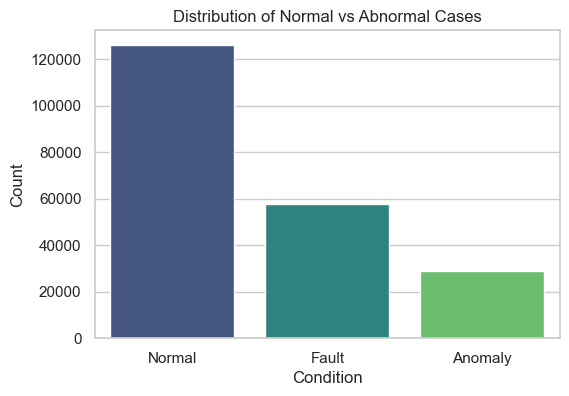

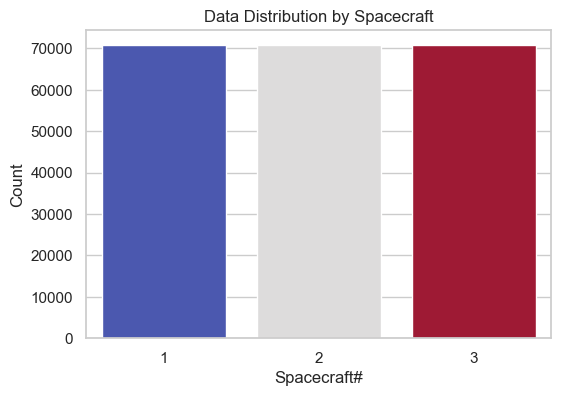

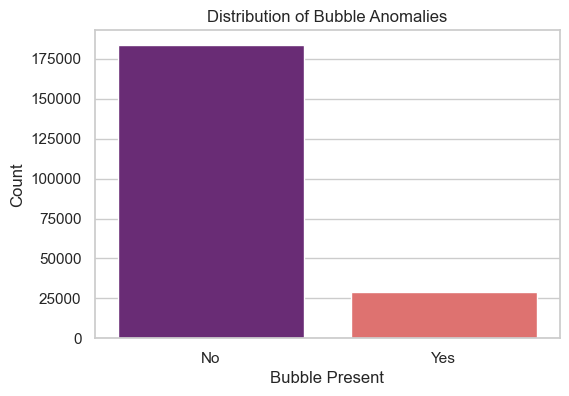

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x="Condition", hue="Condition", legend=False, palette="viridis")
plt.title("Distribution of Normal vs Abnormal Cases")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x="Spacecraft#", hue="Spacecraft#", legend=False, palette="coolwarm")
plt.title("Data Distribution by Spacecraft")
plt.xlabel("Spacecraft#")
plt.ylabel("Count")
plt.show()

bubble_cols = ["Bubble_BP1", "Bubble_BP2", "Bubble_BP3", "Bubble_BP4", 
               "Bubble_BP5", "Bubble_BP6", "Bubble_BP7", "Bubble_BV1"]
merged_df["Bubble_Exists"] = merged_df[bubble_cols].apply(lambda x: (x == "Yes").any(), axis=1)

plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x="Bubble_Exists", hue="Bubble_Exists", legend=False, palette="magma")
plt.title("Distribution of Bubble Anomalies")
plt.xlabel("Bubble Present")
plt.ylabel("Count")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()
